In [37]:
import pandas as pd
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from tldextract import extract as tld_extract
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError

In [38]:
df = pd.read_csv('malicious_phish.csv')
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [39]:
print(df['type'].unique())

['phishing' 'benign' 'defacement' 'malware']


Transformar qualquer uma que seja diferente de begign em malware

In [40]:
df['type'] = df['type'].apply(lambda x: 'benign' if x == 'benign' else 'malware')
df

,url,type
0,br-icloud.com.br,malware
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,malware
4,http://adventure-nicaragua.net/index.php?optio...,malware
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware
651188,www.gamespot.com/xbox360/action/deadspace/,malware
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware


In [41]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['type'])
print(df['label'].unique())
df

[1 0]


,url,type,label
0,br-icloud.com.br,malware,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,malware,1
4,http://adventure-nicaragua.net/index.php?optio...,malware,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1
651188,www.gamespot.com/xbox360/action/deadspace/,malware,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1


In [42]:

vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))
X = vectorizer.fit_transform(df['url']) # matriz de features
y = df['label'] # vector de etiquetas

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = XGBClassifier(n_estimators=100, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:15:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = clf.predict(X_test)

print("Relatorio de Classificação: ")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Acurácia: ", accuracy_score(y_test, y_pred))

Relatorio de Classificação: 
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85778
     malware       0.98      0.94      0.96     44461

    accuracy                           0.97    130239
   macro avg       0.98      0.97      0.97    130239
weighted avg       0.97      0.97      0.97    130239

Acurácia:  0.973993964941377


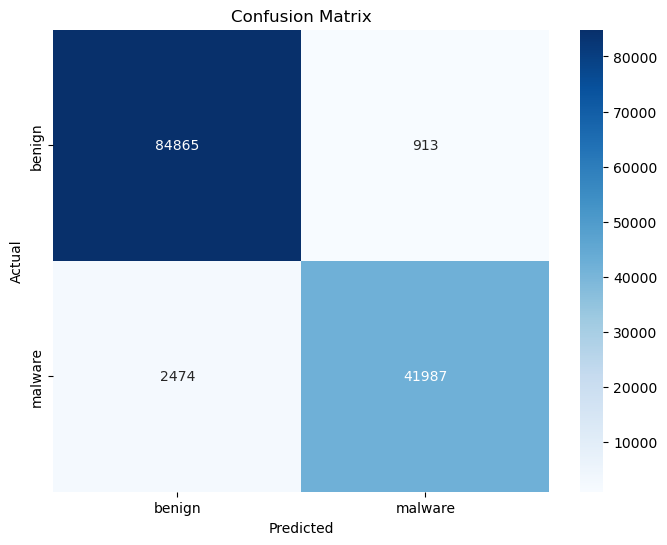

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

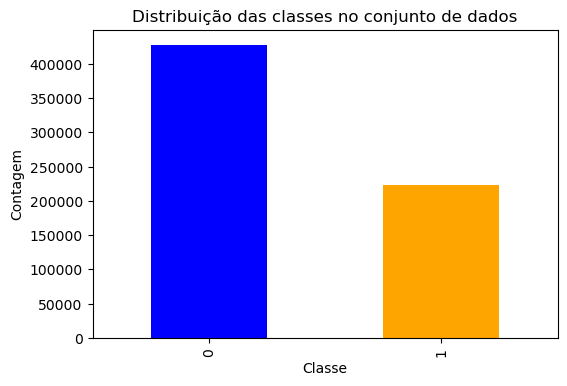

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribuição das classes no conjunto de dados")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores:", cv_scores)
print("Acuraria Media:", cv_scores.mean())

/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:16:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:16:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:16:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:16:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:16:40] WARNING: /w

Cross Validation Scores: [0.98797595 0.98799122 0.98703143 0.90655569 0.72212411]
Acuraria Media: 0.9183356808674089


Removendo os prefixos como https e www

In [ ]:
def remove_prefix(url):
    for prefix in ['https://', 'http://', 'www.']:
        if url.startswith(prefix):
            url = url[len(prefix):]
    return url

df['url'] = df['url'].apply(remove_prefix)

In [ ]:
df

,url,type,label
0,br-icloud.com.br,malware,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,garage-pirenne.be/index.php?option=com_content...,malware,1
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1
651188,gamespot.com/xbox360/action/deadspace/,malware,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1


In [ ]:
def get_length(url):
    return len(url)

df['url_len'] = df['url'].apply(get_length)
df

,url,type,label,url_len
0,br-icloud.com.br,malware,1,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1,44
651188,gamespot.com/xbox360/action/deadspace/,malware,1,38
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1,45


In [ ]:
def extract_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except:
        pri_domain = None
    return pri_domain

df['domain'] = df['url'].apply(extract_domain)

In [ ]:
df

,url,type,label,url_len,domain
0,br-icloud.com.br,malware,1,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77,garage-pirenne.be
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228,adventure-nicaragua.net
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1,39,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1,44,games.teamxbox.com
651188,gamespot.com/xbox360/action/deadspace/,malware,1,38,gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1,45,en.wikipedia.org


In [ ]:
df.dropna(subset=['domain'], inplace=True)
df

,url,type,label,url_len,domain
0,br-icloud.com.br,malware,1,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77,garage-pirenne.be
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228,adventure-nicaragua.net
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1,39,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1,44,games.teamxbox.com
651188,gamespot.com/xbox360/action/deadspace/,malware,1,38,gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1,45,en.wikipedia.org


In [ ]:
def extract_root_domain(url):
    extracted = tld_extract(url)
    root_domain = extracted.domain
    return root_domain

df['root_domain'] = df['url'].apply(extract_root_domain)
df

,url,type,label,url_len,domain,root_domain
0,br-icloud.com.br,malware,1,16,br-icloud.com.br,br-icloud
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77,garage-pirenne.be,garage-pirenne
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228,adventure-nicaragua.net,adventure-nicaragua
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1,39,xbox360.ign.com,ign
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1,44,games.teamxbox.com,teamxbox
651188,gamespot.com/xbox360/action/deadspace/,malware,1,38,gamespot.com,gamespot
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1,45,en.wikipedia.org,wikipedia


In [ ]:
df.isnull().sum()

url            0
type           0
label          0
url_len        0
domain         0
root_domain    0
dtype: int64

In [ ]:
df.duplicated().sum()

11912

In [ ]:
df.drop_duplicates(inplace=True)
df

,url,type,label,url_len,domain,root_domain
0,br-icloud.com.br,malware,1,16,br-icloud.com.br,br-icloud
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77,garage-pirenne.be,garage-pirenne
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228,adventure-nicaragua.net,adventure-nicaragua
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,malware,1,39,xbox360.ign.com,ign
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,malware,1,44,games.teamxbox.com,teamxbox
651188,gamespot.com/xbox360/action/deadspace/,malware,1,38,gamespot.com,gamespot
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),malware,1,45,en.wikipedia.org,wikipedia


Contagem de caracteres especiais

In [ ]:
special_chars = ['/', '?', '=', '-', '.', '@']

def count_special_chars(url):
    return sum(url.count(char) for char in special_chars)

df['special_char_count'] = df['url'].apply(count_special_chars)
df.head()

,url,type,label,url_len,domain,root_domain,special_char_count
0,br-icloud.com.br,malware,1,16,br-icloud.com.br,br-icloud,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid,4
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets,5
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77,garage-pirenne.be,garage-pirenne,9
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228,adventure-nicaragua.net,adventure-nicaragua,8


Quantidade de subdomínios

In [ ]:
def count_subdomains(url):
    # Divide the URL by '.' to count the segments.
    parts = url.split('.')
    # Consider that a valid domain has at least a domain and TLD.
    return max(0, len(parts) - 2)

df['subdomain_count'] = df['url'].apply(count_subdomains)
df[['url', 'subdomain_count']].head()

,url,subdomain_count
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,1
2,bopsecrets.org/rexroth/cr/1.htm,1
3,garage-pirenne.be/index.php?option=com_content...,1
4,adventure-nicaragua.net/index.php?option=com_m...,1


Proporção de dígitos vs. letras

URLs muito recheadas de números podem ser suspeitas

In [ ]:
def digit_letter_ratio(url):
    digit_count = sum(c.isdigit() for c in url)
    letter_count = sum(c.isalpha() for c in url)
    return digit_count / letter_count if letter_count > 0 else digit_count

df['digit_letter_ratio'] = df['url'].apply(digit_letter_ratio)
df.head()

,url,type,label,url_len,domain,root_domain,special_char_count,subdomain_count,digit_letter_ratio
0,br-icloud.com.br,malware,1,16,br-icloud.com.br,br-icloud,3,1,0.000000
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid,4,1,0.034483
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets,5,1,0.040000
3,garage-pirenne.be/index.php?option=com_content...,malware,1,77,garage-pirenne.be,garage-pirenne,9,1,0.125000
4,adventure-nicaragua.net/index.php?option=com_m...,malware,1,228,adventure-nicaragua.net,adventure-nicaragua,8,1,0.112821


TLD (Top-Level Domain)

Certos TLDs são mais propensos a serem usados para spam/phishing

In [ ]:
def extract_tld(url):
    extracted = tld_extract(url)
    return extracted.suffix

df['tld'] = df['url'].apply(extract_tld)
print(df['tld'].value_counts())

tld
com           392775
org            50733
net            28025
de             13443
edu            10077
               ...  
czest.pl           1
donetsk.ua         1
edu.bb             1
edu.om             1
net.hk             1
Name: count, Length: 883, dtype: int64


In [ ]:
data = df.drop(columns=['url', 'type', 'domain'])
data

,label,url_len,root_domain,special_char_count,subdomain_count,digit_letter_ratio,tld
0,1,16,br-icloud,3,1,0.000000,com.br
1,0,35,mp3raid,4,1,0.034483,com
2,0,31,bopsecrets,5,1,0.040000,org
3,1,77,garage-pirenne,9,1,0.125000,be
4,1,228,adventure-nicaragua,8,1,0.112821,net
...,...,...,...,...,...,...,...
651186,1,39,ign,6,2,0.571429,com
651187,1,44,teamxbox,8,1,0.241379,com
651188,1,38,gamespot,5,0,0.100000,com
651189,1,45,wikipedia,4,1,0.000000,org


In [ ]:
data['root_domain'].value_counts()


root_domain
wikipedia                  13426
youtube                     8638
blogspot                    8459
facebook                    8362
yahoo                       5843
                           ...  
mitchell                       1
themarlowepapers               1
michaelowry                    1
memorial-chemindesdames        1
decentrix                      1
Name: count, Length: 147230, dtype: int64

In [ ]:
data

,label,url_len,root_domain,special_char_count,subdomain_count,digit_letter_ratio,tld
0,1,16,br-icloud,3,1,0.000000,com.br
1,0,35,mp3raid,4,1,0.034483,com
2,0,31,bopsecrets,5,1,0.040000,org
3,1,77,garage-pirenne,9,1,0.125000,be
4,1,228,adventure-nicaragua,8,1,0.112821,net
...,...,...,...,...,...,...,...
651186,1,39,ign,6,2,0.571429,com
651187,1,44,teamxbox,8,1,0.241379,com
651188,1,38,gamespot,5,0,0.100000,com
651189,1,45,wikipedia,4,1,0.000000,org


In [ ]:
import hashlib

def hash_encode(text):
    # Converte em string para evitar problemas se houver valores numéricos misturados
    text = str(text)
    hash_object = hashlib.md5(text.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

data['root_domain'] = data['root_domain'].apply(hash_encode)
data

,label,url_len,root_domain,special_char_count,subdomain_count,digit_letter_ratio,tld
0,1,16,1310791,3,1,0.000000,com.br
1,0,35,58335668,4,1,0.034483,com
2,0,31,28611805,5,1,0.040000,org
3,1,77,89045308,9,1,0.125000,be
4,1,228,76838614,8,1,0.112821,net
...,...,...,...,...,...,...,...
651186,1,39,47632402,6,2,0.571429,com
651187,1,44,33842502,8,1,0.241379,com
651188,1,38,61429360,5,0,0.100000,com
651189,1,45,41540124,4,1,0.000000,org


In [ ]:
len(df['tld'].unique())

883

In [ ]:
data['tld'] = data['tld'].apply(hash_encode)
data


,label,url_len,root_domain,special_char_count,subdomain_count,digit_letter_ratio,tld
0,1,16,1310791,3,1,0.000000,44138238
1,0,35,58335668,4,1,0.034483,54754640
2,0,31,28611805,5,1,0.040000,26125624
3,1,77,89045308,9,1,0.125000,15781161
4,1,228,76838614,8,1,0.112821,55660260
...,...,...,...,...,...,...,...
651186,1,39,47632402,6,2,0.571429,54754640
651187,1,44,33842502,8,1,0.241379,54754640
651188,1,38,61429360,5,0,0.100000,54754640
651189,1,45,41540124,4,1,0.000000,26125624


In [ ]:
x = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Aplicar otimização bayesiana

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Supondo que x e y já estejam definidos
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Espaços de busca para cada classificador
param_spaces = {
    'RandomForestClassifier': {
        'n_estimators': (50, 200),
        'max_depth': (3, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 5)
    },
    'XGBClassifier': {
        'n_estimators': (50, 200),
        'max_depth': (3, 20),
        'learning_rate': (0.01, 1.0, 'log-uniform')
    },
    'AdaBoostClassifier': {
        'n_estimators': (50, 200),
        'learning_rate': (0.01, 1.0, 'log-uniform')
    },
    'KNeighborsClassifier': {
        'n_neighbors': (1, 30),
        'weights': ['uniform', 'distance'],
        'p': (1, 2)  # 1 para Manhattan, 2 para Euclidiana
    },
    'DecisionTreeClassifier': {
        'max_depth': (3, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 5)
    },
    'ExtraTreesClassifier': {
        'n_estimators': (50, 200),
        'max_depth': (3, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 5)
    },
    'GaussianNB': {
        'var_smoothing': (1e-9, 1e-5, 'log-uniform')
    }
}

# Lista de classificadores
classificadores = [
    RandomForestClassifier(random_state=42),
    XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    AdaBoostClassifier(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    #GaussianNB()
]

In [ ]:
results = []
for clf in classificadores:
    if clf.__class__.__name__ not in param_spaces:
        print(f"Espaço de busca não definido para {clf.__class__.__name__}. Pulando...")
        continue

    print(f"Treinando {clf.__class__.__name__}...")

    bayes_search = BayesSearchCV(
        estimator = clf,
        search_spaces = param_spaces[clf.__class__.__name__],
        n_iter=32,
        cv=cv,
        scoring='accuracy',
        random_state=42,
        n_jobs=2
    )

    bayes_search.fit(x, y)

    print(f"Melhores parâmetros para {clf.__class__.__name__}:", bayes_search.best_params_)
    print(f"Melhor acurácia de validação para {clf.__class__.__name__}:", bayes_search.best_score_)
    print("-" * 50)

    best_clf = bayes_search.best_estimator_

    pipeline = Pipeline([
        ('classifier', best_clf)
    ])
    scores = cross_val_score(pipeline, data.drop(columns=['label']), data['label'], cv=5, scoring='accuracy')
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y, y_pred, average='weighted')
    results.append((clf.__class__.__name__, accuracy, recall, precision, f1))


Treinando RandomForestClassifier...
Melhores parâmetros para RandomForestClassifier: OrderedDict({'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})
Melhor acurácia de validação para RandomForestClassifier: 0.8770615973936394
--------------------------------------------------
Treinando XGBClassifier...


/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:36:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:37:23] WARNING: /w

KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results